In [5]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [6]:
data = pd.read_csv("Stocks/a.us.txt")
data

,Date,Open,High,Low,Close,Volume,OpenInt
0,1999-11-18,30.713,33.754,27.002,29.702,66277506,0
1,1999-11-19,28.986,29.027,26.872,27.257,16142920,0
2,1999-11-22,27.886,29.702,27.044,29.702,6970266,0
3,1999-11-23,28.688,29.446,27.002,27.002,6332082,0
4,1999-11-24,27.083,28.309,27.002,27.717,5132147,0
...,...,...,...,...,...,...,...
4516,2017-11-06,68.220,68.450,68.220,68.220,995731,0
4517,2017-11-07,68.320,68.640,68.040,68.250,966466,0
4518,2017-11-08,68.100,68.330,67.771,68.110,972616,0
4519,2017-11-09,67.920,67.980,66.910,67.470,1673083,0


In [8]:
data['Date'] = pd.to_datetime(data.Date)

In [9]:
data['Date']

0      1999-11-18
1      1999-11-19
2      1999-11-22
3      1999-11-23
4      1999-11-24
          ...    
4516   2017-11-06
4517   2017-11-07
4518   2017-11-08
4519   2017-11-09
4520   2017-11-10
Name: Date, Length: 4521, dtype: datetime64[ns]

In [12]:
data['year'] = data['Date'].dt.year

In [13]:
data['month'] = data['Date'].dt.month

In [14]:
data['day'] = data['Date'].dt.day

In [15]:
data

,Date,Open,High,Low,Close,Volume,OpenInt,year,month,day
0,1999-11-18,30.713,33.754,27.002,29.702,66277506,0,1999,11,18
1,1999-11-19,28.986,29.027,26.872,27.257,16142920,0,1999,11,19
2,1999-11-22,27.886,29.702,27.044,29.702,6970266,0,1999,11,22
3,1999-11-23,28.688,29.446,27.002,27.002,6332082,0,1999,11,23
4,1999-11-24,27.083,28.309,27.002,27.717,5132147,0,1999,11,24
...,...,...,...,...,...,...,...,...,...,...
4516,2017-11-06,68.220,68.450,68.220,68.220,995731,0,2017,11,6
4517,2017-11-07,68.320,68.640,68.040,68.250,966466,0,2017,11,7
4518,2017-11-08,68.100,68.330,67.771,68.110,972616,0,2017,11,8
4519,2017-11-09,67.920,67.980,66.910,67.470,1673083,0,2017,11,9


Text(0, 0.5, 'price')

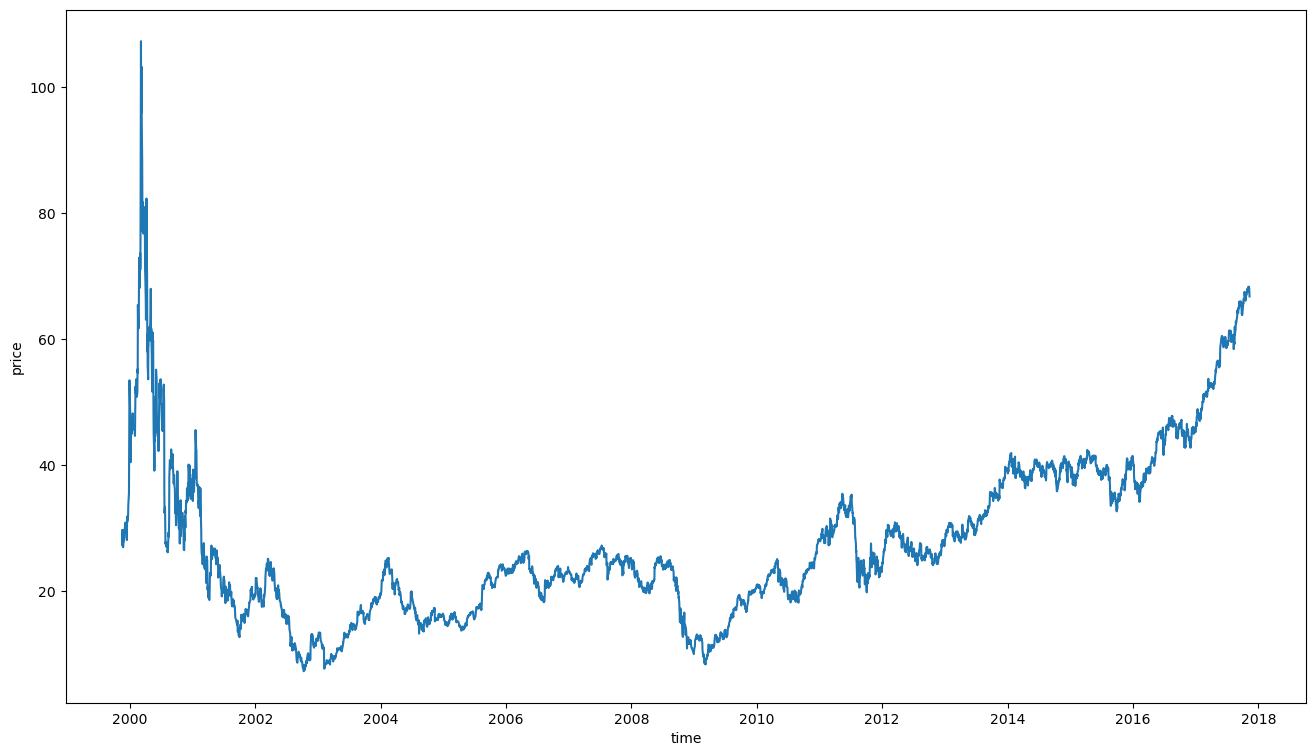

In [16]:
plt.figure(figsize=(16,9))
sns.lineplot(y=data['Close'], x=data['Date'])
plt.xlabel('time')
plt.ylabel('price')

In [17]:
ts = [['2000', '2005'],
      ['2005', '2010'],
      ['2015', '2018']]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

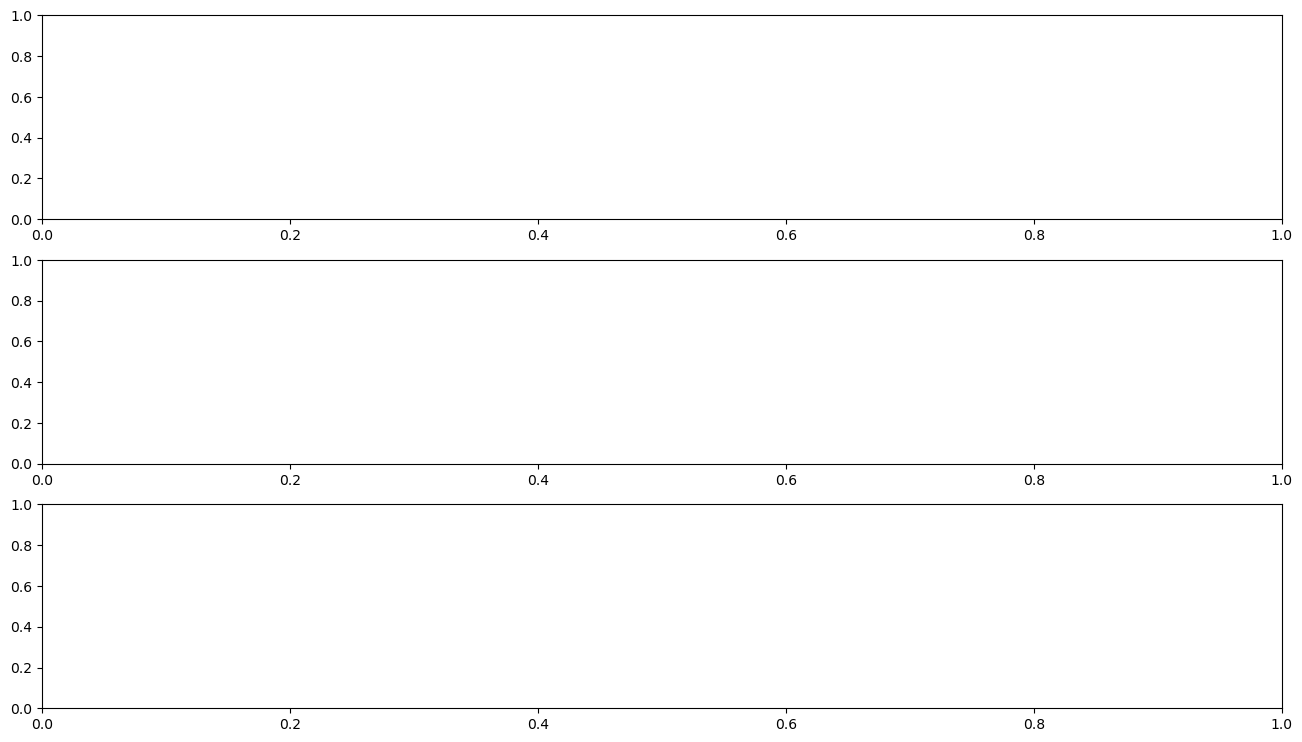

In [20]:
fig, axes = plt.subplots(3,1)
fig.set_size_inches(16,9)
for i in range(4):
    ax = axes[i//2, i%2]
    df = data.loc[(data['Date'] > ts[i][0]) & (data['Date'] < ts[i][1])]
    sns.lineplot(y=data['Close'], x=data['Date'], ax=ax)
    ax.set_title(f'{ts[i][0]}~{ts[i][1]}')
    ax.set_xlabel('time')
    ax.set_ylabel('price')
plt.tight_layout()

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler()

In [24]:
cols = ['Open', 'High', 'Low', 'Close', 'Volume']

In [25]:
scaled = scaler.fit_transform(data[cols])
scaled

array([[0.23950492, 0.25761933, 0.21933581, 0.2237905 , 1.        ],
       [0.22189629, 0.21121072, 0.21790398, 0.19933957, 0.24356559],
       [0.2106806 , 0.21783771, 0.2197984 , 0.2237905 , 0.1051679 ],
       ...,
       [0.62070579, 0.59707862, 0.66836723, 0.6078851 , 0.0146749 ],
       [0.6188705 , 0.5936424 , 0.65888415, 0.60148486, 0.0252436 ],
       [0.61305873, 0.58971529, 0.6565712 , 0.59488461, 0.02571836]])

In [26]:
df = pd.DataFrame(scaled, columns=cols)
df

,Open,High,Low,Close,Volume
0,0.239505,0.257619,0.219336,0.223791,1.000000
1,0.221896,0.211211,0.217904,0.199340,0.243566
2,0.210681,0.217838,0.219798,0.223791,0.105168
3,0.218858,0.215324,0.219336,0.196789,0.095539
4,0.202493,0.204162,0.219336,0.203940,0.077434
...,...,...,...,...,...
4516,0.621929,0.598257,0.673313,0.608985,0.015024
4517,0.622949,0.600122,0.671330,0.609285,0.014582
4518,0.620706,0.597079,0.668367,0.607885,0.014675
4519,0.618870,0.593642,0.658884,0.601485,0.025244


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
xtrain, xtest, ytrain, ytest = train_test_split(df.drop('Close', 1), df['Close'], test_size=0.2, random_state=0, shuffle=False)

C:\Users\user\AppData\Local\Temp\ipykernel_7020\3482217535.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  xtrain, xtest, ytrain, ytest = train_test_split(df.drop('Close', 1), df['Close'], test_size=0.2, random_state=0, shuffle=False)


In [29]:
xtrain.shape

(3616, 4)

In [30]:
ytrain.shape

(3616,)

In [31]:
xtest.shape

(905, 4)

In [32]:
ytest.shape

(905,)

In [33]:
def make_dataset(data, label, window_size=40):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [34]:
xtrain, ytrain = make_dataset(xtrain, ytrain , 40)

In [35]:
xtrain.shape

(3576, 40, 4)

In [36]:
ytrain.shape

(3576,)

In [37]:
ytrain = ytrain.reshape(ytrain.shape[0],1)
ytrain.shape

(3576, 1)

In [38]:
xtest, ytest = make_dataset(xtest, ytest, 40)

In [39]:
xtest.shape

(865, 40, 4)

In [40]:
ytest = ytest.reshape(ytest.shape[0], 1)
ytest.shape

(865, 1)

In [72]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM, SimpleRNN

In [57]:
model_LSTM = Sequential()

In [58]:
model_LSTM.add(LSTM(16,
               input_shape = (xtrain.shape[1], xtrain.shape[2]),
               activation = 'relu',
               return_sequences = False))
model_LSTM.add(Dense(1))

In [59]:
model_LSTM.compile(loss = 'mean_squared_error', optimizer = 'adam')
early_stop = EarlyStopping(monitor = 'val_loss', patience=5)
checkpoint = ModelCheckpoint('tmp_checkpoint.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

In [60]:
xtrain, x_valid, ytrain, y_valid = train_test_split(xtrain, ytrain, test_size=0.2)

In [61]:
history = model_LSTM.fit(xtrain, ytrain,
                    epochs=200,
                    batch_size=16,
                    validation_data=(x_valid, y_valid),
                    callbacks=[early_stop, checkpoint])

Epoch 1/200
136/143 [===========================>..] - ETA: 0s - loss: 0.0031
Epoch 1: val_loss improved from inf to 0.00069, saving model to tmp_checkpoint.h5
143/143 [==============================] - 2s 7ms/step - loss: 0.0030 - val_loss: 6.9073e-04
Epoch 2/200
142/143 [============================>.] - ETA: 0s - loss: 5.2998e-04
Epoch 2: val_loss improved from 0.00069 to 0.00052, saving model to tmp_checkpoint.h5
143/143 [==============================] - 1s 6ms/step - loss: 5.2678e-04 - val_loss: 5.1965e-04
Epoch 3/200
132/143 [==========================>...] - ETA: 0s - loss: 5.3862e-04
Epoch 3: val_loss improved from 0.00052 to 0.00049, saving model to tmp_checkpoint.h5
143/143 [==============================] - 1s 6ms/step - loss: 5.1481e-04 - val_loss: 4.9308e-04
Epoch 4/200
142/143 [============================>.] - ETA: 0s - loss: 4.5261e-04
Epoch 4: val_loss improved from 0.00049 to 0.00044, saving model to tmp_checkpoint.h5
143/143 [==============================] - 1s 6ms

In [62]:
model_LSTM.load_weights('tmp_checkpoint.h5')

In [63]:
pred = model_LSTM.predict(xtest)

28/28 [==============================] - 0s 2ms/step


In [64]:
pred.shape

(865, 1)

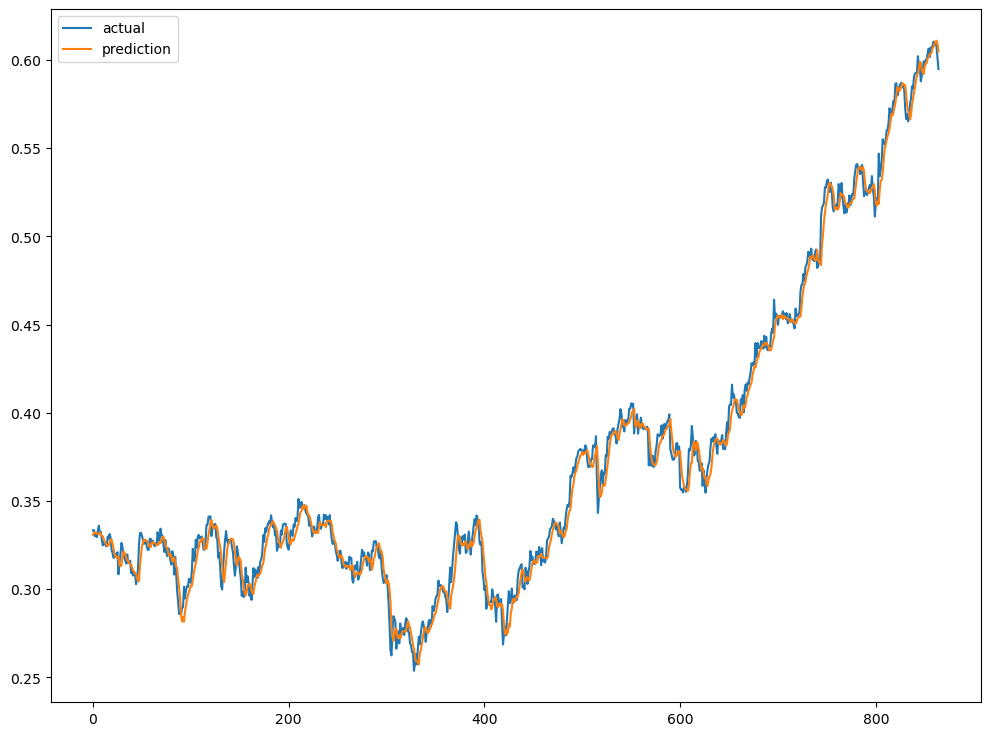

In [65]:
plt.figure(figsize=(12,9))
plt.plot(ytest, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

In [66]:
model_RNN = Sequential()

In [73]:
model_RNN.add(SimpleRNN(16,
               input_shape = (xtrain.shape[1], xtrain.shape[2]),
               return_sequences = False))
model_RNN.add(Dense(1))

In [75]:
model_RNN.compile(loss = 'mean_squared_error', optimizer = 'adam')
early_stop = EarlyStopping(monitor = 'val_loss', patience=5)
checkpoint = ModelCheckpoint('tmp_checkpoint.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

In [76]:
xtrain, x_valid, ytrain, y_valid = train_test_split(xtrain, ytrain, test_size=0.2)

In [77]:
history = model_RNN.fit(xtrain, ytrain,
                    epochs=200,
                    batch_size=16,
                    validation_data=(x_valid, y_valid),
                    callbacks=[early_stop, checkpoint])

Epoch 1/200
104/115 [==========================>...] - ETA: 0s - loss: 0.0018
Epoch 1: val_loss improved from inf to 0.00093, saving model to tmp_checkpoint.h5
115/115 [==============================] - 1s 5ms/step - loss: 0.0018 - val_loss: 9.2865e-04
Epoch 2/200
103/115 [=========================>....] - ETA: 0s - loss: 5.0038e-04
Epoch 2: val_loss improved from 0.00093 to 0.00064, saving model to tmp_checkpoint.h5
115/115 [==============================] - 0s 4ms/step - loss: 4.6996e-04 - val_loss: 6.3734e-04
Epoch 3/200
105/115 [==========================>...] - ETA: 0s - loss: 3.1629e-04
Epoch 3: val_loss improved from 0.00064 to 0.00055, saving model to tmp_checkpoint.h5
115/115 [==============================] - 0s 4ms/step - loss: 3.0726e-04 - val_loss: 5.5243e-04
Epoch 4/200
102/115 [=========================>....] - ETA: 0s - loss: 2.6387e-04
Epoch 4: val_loss improved from 0.00055 to 0.00051, saving model to tmp_checkpoint.h5
115/115 [==============================] - 0s 4ms

In [78]:
pred = model_RNN.predict(xtest)

28/28 [==============================] - 0s 2ms/step


In [79]:
pred.shape

(865, 1)

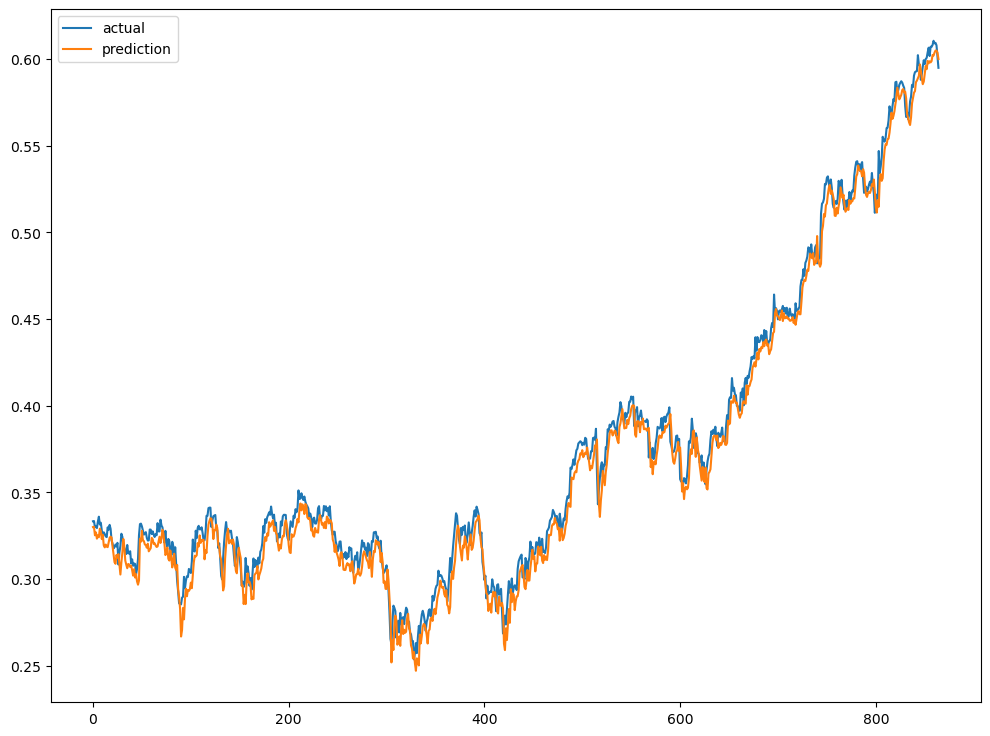

In [80]:
plt.figure(figsize=(12,9))
plt.plot(ytest, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()